In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [75]:
def calc_gmv_weights(excess_returns):
    cov = excess_returns.cov()
    inv_cov = np.linalg.pinv(cov)
    ones = np.ones(excess_returns.shape[1])
    gmv_weights = inv_cov.dot(ones) / ones.dot(inv_cov).dot(ones)
    return gmv_weights

def calc_tang_weights(excess_returns):
    cov = excess_returns.cov()
    inv_cov = np.linalg.pinv(cov)
    ones = np.ones(excess_returns.shape[1])
    tangency_weights = inv_cov.dot(excess_returns.mean()) / ones.dot(inv_cov).dot(excess_returns.mean())
    return tangency_weights

def calc_variance(weights, excess_returns):
    return weights.dot(excess_returns.cov()).dot(weights)

def calc_expected_return(weights, excess_returns):
    return weights.dot(excess_returns.mean())

def calc_efficient_frontier(excess_returns, min_alpha=-1, max_alpha=1.5, num_points=50):
    gmw_weights = calc_gmv_weights(excess_returns)
    tang_weights = calc_tang_weights(excess_returns)
    efficient_frontier = {}
    for alpha in np.linspace(min_alpha, max_alpha, num_points):
        weights = alpha * tang_weights + (1 - alpha) * gmw_weights
        efficient_frontier[alpha] = [calc_variance(weights, excess_returns), calc_expected_return(weights, excess_returns)]
    for imp in [0, 1]:
        if imp not in efficient_frontier.keys():
            weights = imp * tang_weights + (1 - imp) * gmw_weights
            efficient_frontier[imp] = [calc_variance(weights, excess_returns), calc_expected_return(weights, excess_returns)]
    return (
        pd.DataFrame(efficient_frontier)
        .transpose()
        .set_axis(['variance', 'expected_return'], axis=1)
        .assign(volatility=lambda df: df['variance'].apply(np.sqrt))
        .loc[:, ['expected_return', 'volatility']]
        .assign(volatility=lambda df: df['volatility'] * np.sqrt(252))
        .sort_index()
    )

In [19]:
data_raw = pd.read_csv("data/industry_portfolios_49_daily.csv", parse_dates=True, index_col=0)
data = data_raw.loc["2000-01-01":"2023-01-01"]
data.head(5)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-0.0341,-0.0237,-0.0052,-0.0116,0.0167,-0.0057,-0.0168,-0.0255,-0.0275,-0.0241,...,-0.0174,-0.0085,-0.0065,-0.0257,-0.0212,-0.0460,-0.0307,-0.0237,-0.0417,-0.0073
2000-01-04,-0.0268,-0.0227,-0.0219,-0.0111,0.0064,-0.0303,0.0027,-0.0275,-0.0210,-0.0361,...,-0.0184,-0.0257,-0.0317,-0.0346,-0.0182,-0.0385,-0.0361,-0.0131,-0.0460,-0.0213
2000-01-05,0.0300,-0.0003,0.0112,0.0133,-0.0041,-0.0217,-0.0021,-0.0220,-0.0142,0.0196,...,0.0155,0.0031,0.0208,-0.0097,0.0119,-0.0038,0.0032,0.0121,-0.0209,0.0007
2000-01-06,0.0024,0.0099,0.0369,0.0129,-0.0128,0.0003,-0.0181,0.0027,0.0269,-0.0045,...,0.0170,0.0306,0.0315,-0.0014,-0.0073,0.0400,0.0238,-0.0063,0.0200,-0.0021
2000-01-07,0.0277,0.0118,0.0149,0.0525,0.0275,0.0071,0.0085,-0.0127,0.0540,0.0108,...,-0.0060,0.0112,0.0282,0.0479,0.0150,0.0117,0.0426,0.0141,0.0130,0.0045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.0085,0.0053,0.0073,0.0057,0.0089,-0.0021,-0.0034,0.0187,0.0029,-0.0012,...,0.0126,0.0075,0.0057,0.0116,0.0053,0.0057,0.0065,0.0091,0.0046,0.0095
2022-12-27,0.0042,0.0052,0.0055,0.0035,0.0081,-0.0160,-0.0157,-0.0043,0.0089,0.0134,...,0.0057,-0.0025,-0.0016,-0.0086,-0.0013,0.0024,0.0014,-0.0091,-0.0059,-0.0003
2022-12-28,-0.0189,-0.0127,-0.0098,-0.0079,-0.0158,-0.0149,-0.0281,-0.0173,-0.0128,-0.0230,...,-0.0201,-0.0174,-0.0150,-0.0130,-0.0100,-0.0041,-0.0083,-0.0182,-0.0078,-0.0083


In [76]:
efficient_frontier = calc_efficient_frontier(data)
efficient_frontier.head(5)

,expected_return,volatility
-1.000000,-0.000870,0.270883
-0.948980,-0.000808,0.260241
-0.897959,-0.000745,0.249739
-0.846939,-0.000682,0.239393
-0.795918,-0.000620,0.229226


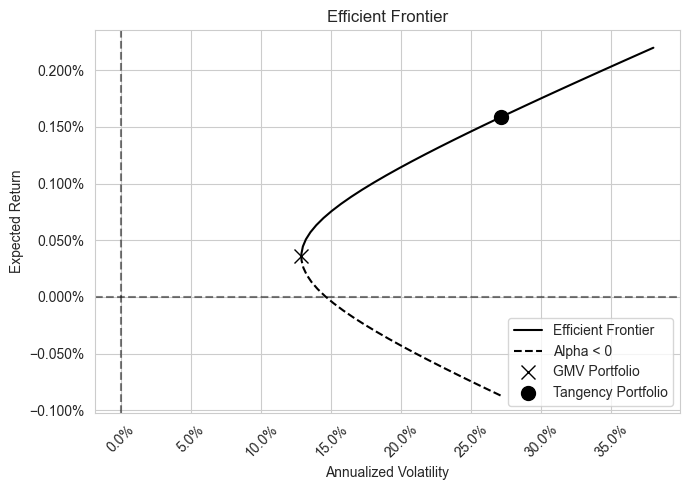

In [180]:
plt.figure(figsize=(7, 5))
plt.axhline(y=0, linestyle='--', color='black', alpha=0.5) 
plt.axvline(x=0, linestyle='--', color='black', alpha=0.5)
plt.plot(
    efficient_frontier["volatility"].loc[lambda df: df.index >= 0], efficient_frontier['expected_return'].loc[lambda df: df.index >= 0],
    linestyle='-', color='black', label="Efficient Frontier"
)
plt.plot(
    efficient_frontier["volatility"].loc[lambda df: df.index <= 0], efficient_frontier['expected_return'].loc[lambda df: df.index <= 0],
    linestyle='--', color='black', label='Alpha < 0'
)
plt.plot(
    efficient_frontier["volatility"].loc[lambda df: df.index == 0],
    efficient_frontier['expected_return'].loc[lambda df: df.index == 0],
    linestyle='', marker='x', color='black', label='GMV Portfolio', markersize=10
)
plt.plot(
    efficient_frontier["volatility"].loc[lambda df: df.index == 1],
    efficient_frontier['expected_return'].loc[lambda df: df.index == 1],
    linestyle='', marker='o', color='black', label='Tangency Portfolio', markersize=10
)
plt.title('Efficient Frontier')
plt.ylabel('Expected Return')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.xlabel('Annualized Volatility')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('reports/graphics/report_efficient_frontier.png')
plt.show()

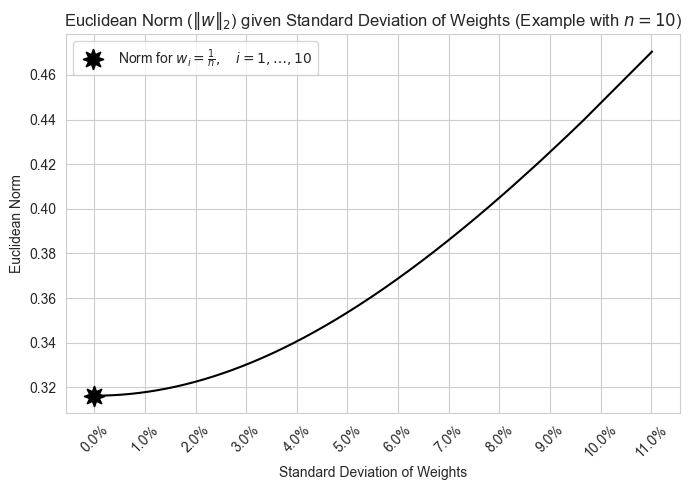

In [183]:
N_ASSETS = 10
np.random.seed(42)
std_norm = {}
for var in np.linspace(0, .05, 10_000):
    weights = np.random.normal(1 / N_ASSETS, var, N_ASSETS)
    weights /= weights.sum()
    std_norm[weights.std()] = np.linalg.norm(weights, ord=2)
std_norm_plot = (
    pd.DataFrame(std_norm, index=["norm"])
    .transpose()
    .sort_index()
)
plt.figure(figsize=(7, 5))
plt.plot(
    std_norm_plot.iloc[0].index, std_norm_plot["norm"].iloc[0],
    linestyle='', color='black', markersize=15,
    label='Norm for $w_i = \\frac{1}{n}, \\quad  i = 1, \\ldots, 10$',
    marker=(8, 1, 0),
)
plt.plot(
    std_norm_plot.index, std_norm_plot["norm"],
    linestyle='-', color='black'
)
plt.title('Euclidean Norm ($\\| w \\|_2$) given Standard Deviation of Weights (Example with $n=10$)')
plt.ylabel('Euclidean Norm')
plt.xlabel('Standard Deviation of Weights')
plt.xticks(np.linspace(0, .11, 12))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('reports/graphics/report_euclidean_norm.png')
plt.show()